In [107]:
import numpy as np
import pandas as pd

df = pd.read_csv('/Users/huangz55/Downloads/merged_hpl.csv')

In [108]:
df.head()

,BibID_x,ISBN,Month,Year,NumOfAvailItems,NumOfCKOs,BibID_y,Author,Title,Summary,Genre,Topical_Main,Topical_Geographic
0,453623,9780062846877,10,2019,3,6,453623.0,Navarro Joe,The dictionary of body language,NaN,NaN,"Body language,Dictionaries,Encyclopedias and d...",NaN
1,453623,9780062846877,11,2019,3,2,453623.0,Navarro Joe,The dictionary of body language,NaN,NaN,"Body language,Dictionaries,Encyclopedias and d...",NaN
2,453623,9780062846877,12,2019,3,1,453623.0,Navarro Joe,The dictionary of body language,NaN,NaN,"Body language,Dictionaries,Encyclopedias and d...",NaN
3,453623,9780062846877,2,2019,3,8,453623.0,Navarro Joe,The dictionary of body language,NaN,NaN,"Body language,Dictionaries,Encyclopedias and d...",NaN
4,453623,9780062846877,3,2019,3,5,453623.0,Navarro Joe,The dictionary of body language,NaN,NaN,"Body language,Dictionaries,Encyclopedias and d...",NaN


In [109]:
df.shape

(942901, 13)

In [110]:
import math
import matplotlib.pyplot as plt


w_vector = []
init_vector = [1] * 12
for i in range(len(init_vector) + 1):
    w_vector.append(math.exp(i - len(init_vector)))

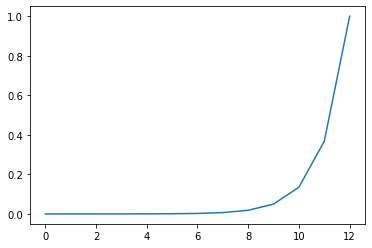

In [111]:
plt.plot(w_vector)

In [112]:
w_vector 

[6.14421235332821e-06,
 1.670170079024566e-05,
 4.5399929762484854e-05,
 0.00012340980408667956,
 0.00033546262790251185,
 0.0009118819655545162,
 0.0024787521766663585,
 0.006737946999085467,
 0.01831563888873418,
 0.049787068367863944,
 0.1353352832366127,
 0.36787944117144233,
 1.0]

In [113]:
df_s = df.iloc[:13]

In [114]:
output = np.dot(df_s['NumOfCKOs'].to_numpy(), np.transpose(w_vector))

In [115]:
output

3.4838323841893426

In [116]:
df_f = df.iloc[:45].copy()

In [117]:
months_2019_series = df_f[df_f.Year ==2019].groupby(['ISBN']).Month.size()

In [118]:
months_2019_series

ISBN
9780062846877    11
9780385686761     7
9780451472168    11
9781480570177     8
Name: Month, dtype: int64

In [119]:
len(months_2019_series)

4

In [120]:
months_2019_series[9780062846877]

11

In [121]:
def month_transform(row):
    if months_2019_series[row.ISBN] == None:
        months_2019 = months_2019_series[row.ISBN]
    if row.Year == 2020:
        row.Month = row.Month + 12
    return row.Month

df_f.Month = df_f.apply(month_transform, axis=1)

In [122]:
ck_series = df_f.groupby(['ISBN']).NumOfCKOs

In [123]:
months_series = df_f.groupby(['ISBN']).Month.size()

In [124]:
for i in ck_series:
    print(i[0])

9780062846877
9780385686761
9780451472168
9781480570177


In [125]:
output_lst = []
for book in ck_series:
    w_vector = []
    init_vector = [1] * (months_series[book[0]] - 1)
    for i in range(len(init_vector) + 1):
        w_vector.append(math.exp(i - len(init_vector)))
    output = np.dot(book[1].to_numpy(), np.transpose(w_vector))
    output_lst.append(output)
    

In [126]:
output_lst

[3.4838323841893426,
 3.6725968436051226,
 3.6600333064181303,
 1.6997946608624108]

In [128]:
df_c = df.copy()
ck_series = df_c.groupby(['ISBN']).NumOfCKOs
months_series = df_c.groupby(['ISBN']).Month.size()
months_2019_series = df_c[df_c.Year == 2019].groupby(['ISBN']).Month.size()
#df_c.Month = df_c.apply(month_transform, axis=1)
output_lst = []
for book in ck_series:
    w_vector = []
    init_vector = [1] * (months_series[book[0]] - 1)
    for i in range(len(init_vector) + 1):
        w_vector.append(math.exp(i - len(init_vector)))
    output = np.dot(book[1].to_numpy(), np.transpose(w_vector))
    output_lst.append(output)


In [129]:
output_lst

[4.582983358266338,
 1.8297023388240665,
 1.3678794411714423,
 1.602788861143783,
 2.7357588823428847,
 1.6180772905834278,
 1.3678794411714423,
 2.614752811440998,
 2.656640116290246,
 1.3678794411714423,
 1.602788861143783,
 4.589633070553387,
 1.9117774834548638,
 2.0064294488161103,
 2.9208812339473615,
 1.8710941655794975,
 1.7293468786715738,
 1.0,
 1.0,
 1.0,
 2.503214724408055,
 5.503214724408055,
 2.1417647320527227,
 1.7381241443803956,
 3.5780553786637386,
 3.5124605364152397,
 5.722894173266582,
 1.6883370760125316,
 1.702362997879511,
 1.3678794411714423,
 2.553001792775919,
 4.70642718465811,
 1.787768147992423,
 1.3678794411714423,
 1.6385500076446677,
 1.0,
 1.6883370760125316,
 1.3678794411714423,
 2.3592286444129127,
 1.6385500076446677,
 1.0,
 2.6414835525083915,
 1.0,
 2.478052636705266,
 3.1792661411067753,
 1.8236723592491444,
 1.0,
 1.0,
 4.569404581905209,
 1.3678794411714423,
 1.6278424470316026,
 2.615881549848971,
 4.634409790297688,
 3.1417647320527227,
 5.8